<a href="https://colab.research.google.com/github/M0h4amad/Dirac/blob/master/Copy_of_Copy_of_Inrtoduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow introduction

Tensorflow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and also used for machine learning applications such as neural networks. Here we try to introduce it using some easy elementry examples.

In [0]:
%matplotlib inline

import numpy as np
import pylab as plt
import tensorflow as tf

params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

You can define constant in different format like:

In [0]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1)
print(node2)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)


As mentioned before, tnesorflow is a C basec packages which has python interface. For calculation you should open a tensorflow session like:

In [0]:
with tf.Session() as sess:
    print(sess.run([node1, node2]))

[3.0, 4.0]


For example if you want to add two number using tensorflow, you can make the data flow through operations (here addition) then you have to open a session (here by with command) and run it like:

In [0]:
node3 = tf.add(node1, node2)
with tf.Session() as sess:
    print(sess.run(node3))

7.0


In [0]:
node3 = node1* node2
with tf.Session() as sess:
    print(sess.run(node3))

12.0


In [0]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# adder_node = tf.add(a, b)
adder_node = a + b
with tf.Session() as sess:
    print(sess.run(adder_node, {a: 3, b:4.5}))
    print(sess.run(adder_node, {a: [1,3], b: [2, 4]}))

7.5
[3. 7.]


Or you can define more complicated precedures:

In [0]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32)
adder_node = (a + b)*c
with tf.Session() as sess:
    print(sess.run(adder_node, {a: 3, b:4.5, c:2}))
    

15.0




Sinse almost every Machine learning problem is based on optimization, let's try to solve an optimization problem. For this pupose assume that there are an input set "x_train" which we want to find a simple linear model <br>
$y=W\times x+b$ <br>
to predict "y_train" vector. 

In [0]:
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b
init = tf.global_variables_initializer()#baraye initialize kardane variable ha
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(linear_model, {x:x_train}))

Instructions for updating:
Colocations handled automatically by placer.
[0.         0.3        0.6        0.90000004]


In [0]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(loss, {x:x_train, y:y_train}))

23.66


In [0]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train, {x:x_train, y:y_train})

    print(sess.run([W, b]))

Instructions for updating:
Use tf.cast instead.
[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


In [0]:
# evaluate training accuracy
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train, {x:x_train, y:y_train})
        
    curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x:x_train, y:y_train})
    print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.9999969] b: [0.9999908] loss: 5.6999738e-11


# Example

In [0]:
!pip install gdown

In [0]:
!gdown https://drive.google.com/uc?id=1TZDu_QJ7BZ6iEt3LHgycOftNfKCmZNX0

Downloading...
From: https://drive.google.com/uc?id=1TZDu_QJ7BZ6iEt3LHgycOftNfKCmZNX0
To: /content/data.zip
333MB [00:02, 153MB/s]


In [0]:
!ls

1TZDu_QJ7BZ6iEt3LHgycOftNfKCmZNX0  data.zip  sample_data


In [0]:
!unzip -q data.zip

In [0]:
!ls data

data.fits  sdss


In [0]:
!git clone https://github.com/vafaei-ar/SBUDS-workshop-2019.git

Cloning into 'SBUDS-workshop-2019'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 98 (delta 34), reused 71 (delta 15), pack-reused 0
Unpacking objects: 100% (98/98), done.


In [0]:
!ls SBUDS-workshop-2019/

images	LICENSE  README.md  session_II-problems  session_I-TF_intro


In [0]:
!ls SBUDS-workshop-2019/session_I-TF_intro/

datasets  Inrtoduction.ipynb  README.md


In [0]:
!ls SBUDS-workshop-2019/session_I-TF_intro/datasets/

Hoda_data.npz  mnist.npz


In [0]:
with np.load('SBUDS-workshop-2019/session_I-TF_intro/datasets/mnist.npz', allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

x_train, x_test = x_train / 255.0, x_test / 255.0

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


0


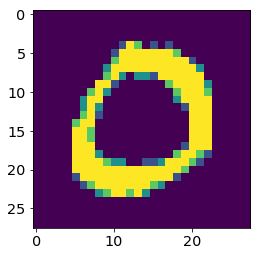

In [0]:
i_img = np.random.randint(len(x_train))
plt.imshow(x_train[i_img])
print(y_train[i_img])

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#yek araye ye yek bodi 28*28_flatten in kar ra mikonad
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),#ehtemale overfit kam mishavad
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
#cross_validation means keep a percentage of the total data to test them. when we do it several times its called cross_validation

Epoch 1/5
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0392 - acc: 0.9870
Epoch 2/5
60000/60000 [==============================] - 17s 286us/sample - loss: 0.0306 - acc: 0.9900
Epoch 3/5
60000/60000 [==============================] - 17s 289us/sample - loss: 0.0281 - acc: 0.9908
Epoch 4/5
60000/60000 [==============================] - 18s 308us/sample - loss: 0.0247 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 18s 301us/sample - loss: 0.0229 - acc: 0.9921


In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.0662 - acc: 0.9829


[0.06620827327684092, 0.9829]

In [0]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset or a dataset iterator. Should return a tuple


In [0]:
#khube ke batch size be andazeye ram e GPU entekhab shavad

In [0]:
hist = model.history
hist.epoch

[0, 1, 2, 3, 4]

Text(0,0.5,'acc')

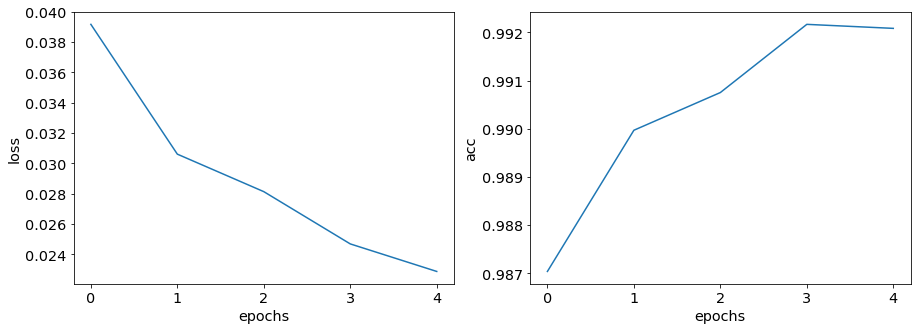

In [0]:
hist = model.history

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.plot(hist.epoch,hist.history['loss'])
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')

ax2.plot(hist.epoch,hist.history['acc'])
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')

In [0]:
n_train = 50000

with np.load('./SBUDS-workshop-2019/session_I-TF_intro/datasets/Hoda_data.npz', allow_pickle=True) as f:
    print (f['img'].shape,f['target'].shape)
    x_train, y_train = f['img'][:n_train], f['target'][:n_train]
    x_test, y_test = f['img'][n_train:], f['target'][n_train:]
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
    


((80000, 32, 32), (80000, 10))
((50000, 32, 32), (50000, 10), (30000, 32, 32), (30000, 10))


CPU times: user 16.4 ms, sys: 1.12 ms, total: 17.6 ms
Wall time: 23.1 ms


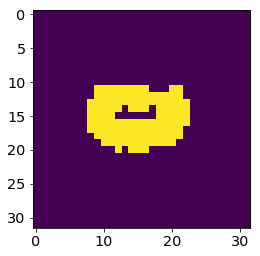

In [0]:
%time plt.imshow(x_train[2])

In [0]:
from time import time, sleep

In [0]:
time()

1556795069.489573

In [0]:
t0 = time()
while True:
  if time()-t0>20:
    print(time()-t0)
    break

20.0000009537
